In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [128]:
start = 0
stop = 720

# Import submissions
submission_0_name = 'submit_6.csv'
submission_1_name = '../../predictions_1.csv'
submission_2_name = '../../predictions_2.csv'
submission_3_name = '../../predictions_3.csv'
submission_4_name = '../../predictions_4.csv'
submission_5_name = '../../predictions_5.csv'
submission_6_name = '../../predictions_6.csv'
submission_7_name = '../../predictions_7.csv'
submission_8_name = '../../predictions_8.csv'
submission_9_name = '../../submission.csv'

submission_0 = pd.read_csv(submission_0_name)[start:stop]
submission_1 = pd.read_csv(submission_1_name)[start:stop]
submission_2 = pd.read_csv(submission_2_name)[start:stop]
submission_3 = pd.read_csv(submission_3_name)[start:stop]
submission_4 = pd.read_csv(submission_4_name)[start:stop]
submission_5 = pd.read_csv(submission_5_name)[start:stop]
submission_6 = pd.read_csv(submission_6_name)[start:stop]
submission_7 = pd.read_csv(submission_7_name)[start:stop]
submission_8 = pd.read_csv(submission_8_name)[start:stop]
submission_9 = pd.read_csv(submission_9_name)[start:stop]

predictions = [submission_0, submission_1, submission_2, submission_3, submission_4, submission_5, submission_6, submission_7, submission_8, submission_9]

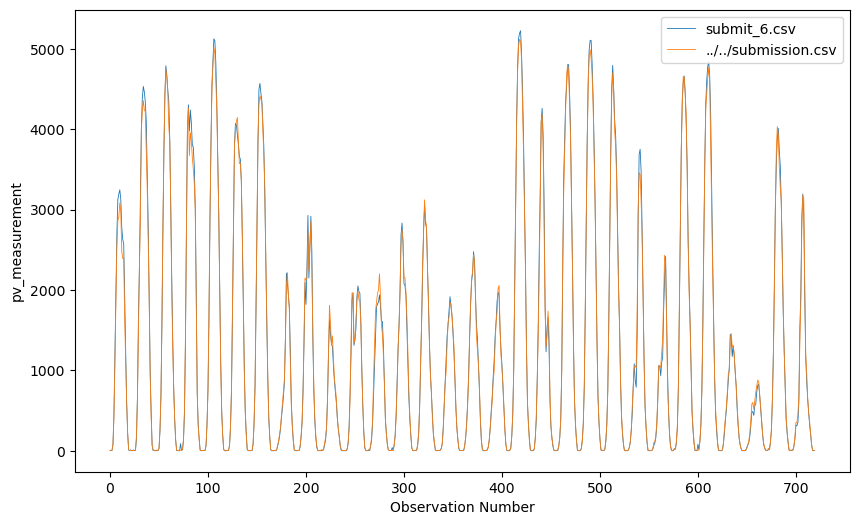

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(submission_0['prediction'].reset_index(drop=True), label=submission_0_name, linewidth=0.6)
plt.plot(submission_9['prediction'].reset_index(drop=True), label=submission_9_name, linewidth=0.6)
# plt.plot(submission_3['prediction'].reset_index(drop=True), label=submission_3_name, linewidth=0.6)
plt.xlabel('Observation Number')
plt.ylabel('pv_measurement')
plt.legend()
plt.savefig('true_vs_pred.png')
plt.show()

MAE:  51.7862052275109
MAE 1_2:  97.05021019438098
MAE 2_3:  52.21350750702439
MAE 1_3:  122.50642997573001


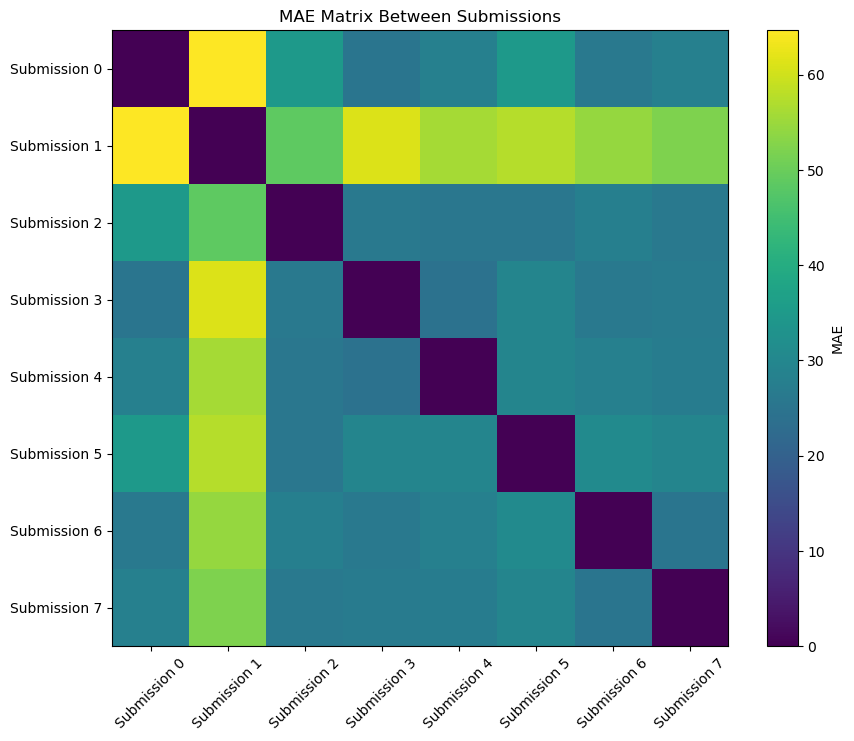

In [132]:
mae_0_1 = mean_absolute_error(submission_0['prediction'], submission_9['prediction'])
mae_1_2 = mean_absolute_error(submission_1['prediction'], submission_2['prediction'])
mae_2_3 = mean_absolute_error(submission_2['prediction'], submission_3['prediction'])
mae_1_3 = mean_absolute_error(submission_1['prediction'], submission_3['prediction'])
print('MAE: ', mae_0_1)
print('MAE 1_2: ', mae_1_2)
print('MAE 2_3: ', mae_2_3)
print('MAE 1_3: ', mae_1_3)

# Calculating MAE for each pair of submissions
mae_matrix = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        mae_matrix[i, j] = mean_absolute_error(predictions[i], predictions[j])

# Visualizing the MAE matrix
plt.figure(figsize=(10, 8))
plt.imshow(mae_matrix, cmap='viridis')
plt.colorbar(label='MAE')
plt.xticks(range(8), [f'Submission {i}' for i in range(8)], rotation=45)
plt.yticks(range(8), [f'Submission {i}' for i in range(8)])
plt.title('MAE Matrix Between Submissions')
plt.show()